In [19]:
import os

# Check current directory and files
print("Current working directory:", os.getcwd())
print("Files in this folder:", os.listdir())

# Load dataset with error handling
try:
    df = pd.read_csv("insurance.csv")  # make sure the file is here
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: insurance.csv not found in this folder!")


Current working directory: c:\Users\nathi\OneDrive\Documents\plp work\python\week7\ANALYSIS
Files in this folder: ['.qodo', 'analysis.ipynb', 'insurance.csv']
Dataset loaded successfully!


In [20]:
# Dataset info: types, non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [21]:
# Show first 5 rows
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: make plots look nicer
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


In [22]:
# Check for missing values
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [23]:
# Basic statistics for numerical columns
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [24]:
# Fill numeric missing values with median (if any)
for col in df.select_dtypes(include=['float64', 'int64']):
    df[col].fillna(df[col].median(), inplace=True)

# Drop rows with missing categorical values (if any)
df.dropna(inplace=True)

# Confirm dataset is clean
df.isnull().sum()


C:\Users\nathi\AppData\Local\Temp\ipykernel_10984\2955379955.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\nathi\AppData\Local\Temp\ipykernel_10984\2955379955.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [25]:
# Average charges by smoker status
avg_charges_smoker = df.groupby('smoker')['charges'].mean()
print("Average charges by smoker status:\n", avg_charges_smoker)

# Average charges by region
avg_charges_region = df.groupby('region')['charges'].mean()
print("\nAverage charges by region:\n", avg_charges_region)


Average charges by smoker status:
 smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

Average charges by region:
 region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


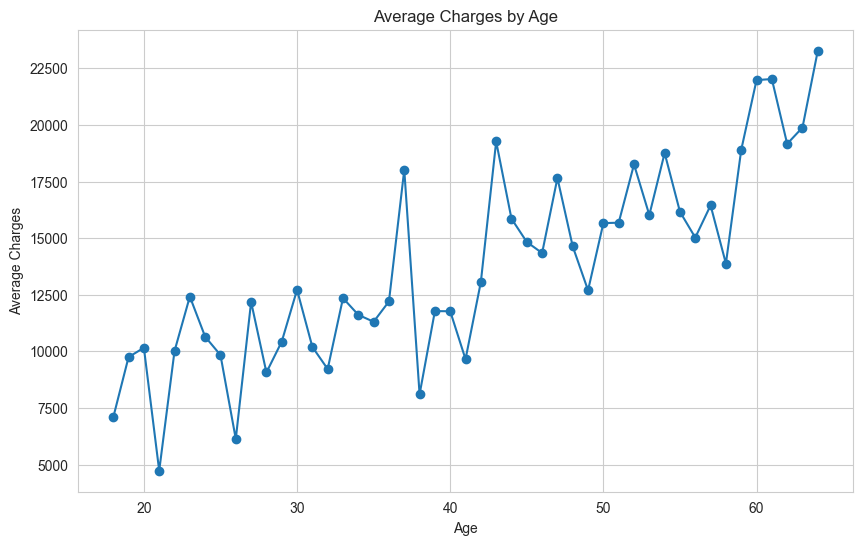

In [26]:
age_charges = df.groupby('age')['charges'].mean()
plt.plot(age_charges.index, age_charges.values, marker='o')
plt.title("Average Charges by Age")
plt.xlabel("Age")
plt.ylabel("Average Charges")
plt.show()


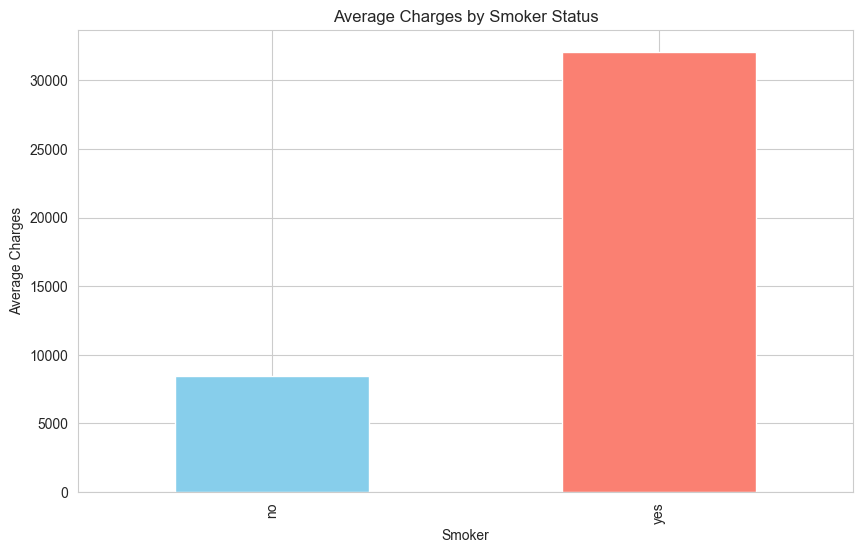

In [27]:
avg_charges_smoker.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Average Charges by Smoker Status")
plt.xlabel("Smoker")
plt.ylabel("Average Charges")
plt.show()


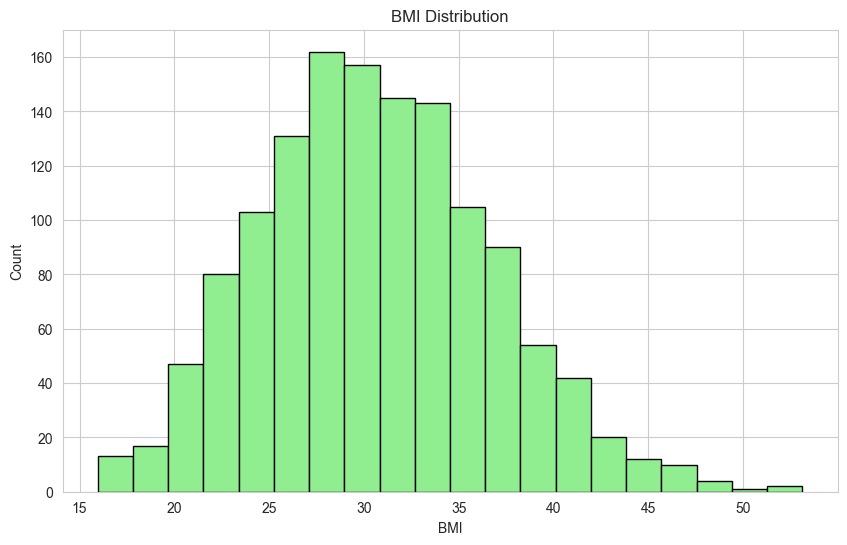

In [28]:
plt.hist(df['bmi'], bins=20, color='lightgreen', edgecolor='black')
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()


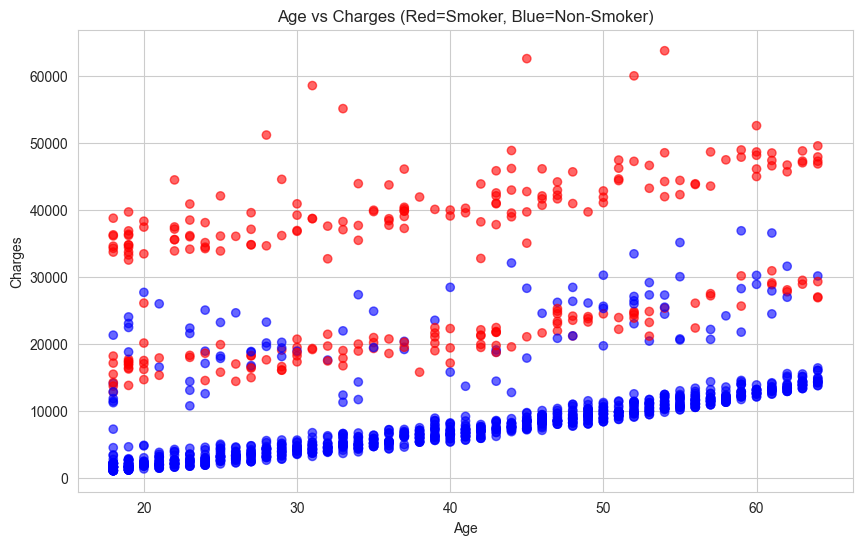

In [29]:
plt.scatter(df['age'], df['charges'], alpha=0.6, c=df['smoker'].map({'yes':'red','no':'blue'}))
plt.title("Age vs Charges (Red=Smoker, Blue=Non-Smoker)")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()


- Smokers pay significantly higher charges than non-smokers.
- Older people tend to have higher insurance charges.
- BMI is mostly between 25 and 35 for this dataset.
- Scatter plot shows smokers clearly have higher charges across ages.
- Regional differences in charges exist but are smaller compared to smoking effect.
